In [1]:
import csv
import os
import re
from collections import Counter
from collections import defaultdict
from itertools import groupby
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['figure.figsize'] = (6.0, 4.0) # 设置figure_size尺寸

In [2]:
ann_dir = "../data/train_ann"

In [3]:
data = []
for ann_fname in os.listdir(ann_dir):
    ann_path = os.path.join(ann_dir, ann_fname)
    with open(ann_path) as f:
        reader = csv.reader(f, delimiter="\t")
        for row in reader:
            tag_info  = row[1]
            tag_info = re.sub("\d+;\d+ ", "", tag_info)
            tp, start, end = tag_info.split()
            data.append((tp, int(start), int(end), row[-1]))
            
data.sort(key=lambda x:x[0])

<BarContainer object of 15 artists>

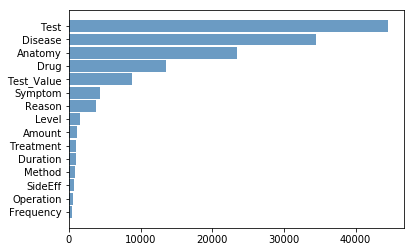

In [4]:
class_count = {}
for k, g in groupby(data, key=lambda x: x[0]):
    entities = [item[-1] for item in g]
    class_count[k] = len(entities)

cnt_sort = sorted(class_count.items(), key=lambda x: x[1])
names, counts = zip(*cnt_sort)

plt.barh(range(len(counts)), counts,  height=0.9, color='steelblue', alpha=0.8, tick_label=names) 

实体类型与数量

In [5]:
from matplotlib.font_manager import *
myfont = FontProperties(fname='/usr/share/fonts/wqy-zenhei/wqy-zenhei.ttc')

#plt.rcParams['font.sans-serif']=['WenQuanYi Micro Hei Mono'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号
char_count = {}
for k, g in groupby(data, key=lambda x: x[0]):
    entities = [item[-1] for item in g]
    cnt = defaultdict(int)
    for c in "".join(entities).replace(" ", ""):
        if c.isdigit():
            cnt['<num>'] += 1
        elif re.search("[a-zA-Z]", c):
            cnt["<letter>"] += 1
        else:
            cnt[c] += 1
    cnt_new = sorted(cnt.items(), key=lambda x: -x[1])[:50]
    print("=================================")
    print("[", k, "]::")
    pprint(cnt_new)
#     plt.bar(range(len(char)), count, tick_label=char)
#     plt.xtick(char, fontproperties=myfont)
#     break

[ Amount ]::
[('<num>', 2651),
 ('<letter>', 2147),
 ('/', 464),
 ('.', 284),
 ('~', 182),
 ('量', 119),
 ('剂', 106),
 ('μ', 93),
 ('克', 48),
 ('毫', 38),
 ('%', 36),
 ('大', 34),
 ('小', 29),
 ('(', 27),
 (')', 25),
 ('单', 25),
 ('位', 24),
 ('高', 21),
 ('每', 19),
 ('次', 19),
 ('低', 18),
 ('片', 17),
 ('·', 17),
 ('、', 13),
 ('天', 13),
 ('重', 12),
 ('日', 11),
 ('千', 10),
 ('体', 10),
 ('∥', 9),
 ('起', 8),
 ('-', 8),
 ('粒', 8),
 ('始', 7),
 ('最', 7),
 ('中', 7),
 ('<', 7),
 ('±', 6),
 ('为', 6),
 ('较', 5),
 ('>', 4),
 ('周', 4),
 ('于', 4),
 (',', 4),
 ('增', 3),
 ('和', 3),
 ('滋', 3),
 ('≥', 3),
 ('至', 3),
 ('微', 3)]
[ Anatomy ]::
[('<letter>', 37430),
 ('<num>', 8814),
 ('细', 4993),
 ('胞', 4970),
 ('-', 2981),
 ('胰', 1908),
 ('β', 1828),
 ('岛', 1546),
 ('素', 1395),
 ('骨', 1388),
 ('脂', 1279),
 ('肪', 1109),
 ('肾', 1077),
 ('脏', 1066),
 ('血', 908),
 ('管', 820),
 ('白', 779),
 ('腺', 779),
 ('组', 772),
 ('织', 739),
 ('体', 720),
 ('蛋', 678),
 ('皮', 670),
 ('内', 652),
 ('肝', 632),
 ('因', 592),
 ('基', 546

In [10]:
# 特殊字符
s1 = "".join([d[-1][0] for d in data])
print(Counter(s).most_common(500))
# symbol = tuple(set(re.findall("\W", s)))
# print(symbol)

[('血', 6383), ('糖', 5889), ('胰', 5621), ('T', 4856), ('2', 4733), ('H', 3847), ('G', 2961), ('A', 2719), ('肾', 2525), ('F', 2489), ('体', 2362), ('高', 2335), ('1', 2325), ('骨', 2296), ('C', 2294), ('M', 2189), ('脂', 2155), ('甲', 2055), ('I', 1986), ('P', 1956), ('D', 1939), ('L', 1822), ('心', 1797), ('S', 1638), ('低', 1608), ('B', 1498), ('肥', 1396), ('空', 1378), ('尿', 1335), ('β', 1276), ('肝', 1172), ('二', 1150), ('N', 1042), ('R', 914), ('m', 863), ('腰', 821), ('代', 729), ('格', 666), ('内', 664), ('利', 642), ('3', 631), ('冠', 600), ('<', 583), ('甘', 565), ('升', 561), ('中', 560), ('降', 560), ('超', 556), ('维', 556), ('下', 534), ('餐', 521), ('5', 510), ('动', 494), ('≥', 493), ('口', 483), ('慢', 460), ('成', 452), ('增', 451), ('总', 450), ('收', 446), ('0', 445), ('4', 439), ('肌', 420), ('磺', 389), ('白', 370), ('舒', 368), ('基', 366), ('(', 363), ('结', 363), ('明', 358), ('V', 356), ('抗', 352), ('脑', 350), ('腹', 343), ('正', 339), ('O', 336), ('颈', 334), ('肿', 332), ('阿', 328), ('U', 327), ('他', 

In [11]:
s2 = "".join([d[-1][-1] for d in data])
print(Counter(s2).most_common(500))

[('病', 10698), ('糖', 6044), ('素', 5847), ('胞', 4748), ('C', 4412), ('L', 2621), ('1', 2584), ('G', 2524), ('R', 2432), ('S', 2233), ('A', 2119), ('重', 2103), ('压', 2002), ('D', 1977), ('症', 1753), ('H', 1732), ('胖', 1722), ('M', 1688), ('4', 1582), ('T', 1545), ('高', 1515), ('I', 1496), ('醇', 1386), ('酸', 1332), ('剂', 1276), ('数', 1231), ('2', 1207), ('物', 1172), ('度', 1076), ('3', 1065), ('白', 1060), ('P', 1055), ('常', 1050), ('抗', 1035), ('胍', 1031), ('能', 989), ('征', 960), ('肽', 933), ('脏', 843), ('化', 829), ('汀', 826), ('%', 818), ('N', 818), ('s', 816), ('变', 806), ('体', 764), ('g', 738), ('织', 720), ('酮', 714), ('酶', 701), ('围', 684), ('瘤', 661), ('低', 647), ('量', 646), ('性', 633), ('6', 618), ('癌', 578), ('期', 571), ('β', 527), ('酯', 526), ('l', 523), ('5', 507), ('0', 495), ('平', 490), ('炎', 483), ('d', 477), ('B', 476), ('腺', 474), ('n', 450), ('管', 449), ('率', 437), ('K', 433), ('降', 425), (')', 413), ('b', 400), ('脂', 398), ('脉', 395), ('术', 390), ('减', 387), ('松', 372), ('亡